<a href="https://colab.research.google.com/github/JeroDeNero/CAP4630/blob/master/CAP4630HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem 1

In [0]:
import numpy as np
import skimage.data
import matplotlib.pyplot as plt
import math

input_mat = skimage.data.chelsea()
input_mat = skimage.color.rgb2gray(input_mat) #we change the image to have 2 channels

Creating the convolution function

In [0]:
def conv2d(input_mat, kernel_mat, stride = 1):
  
  #Ensures that the input matrix isn't a numpy array
  try:
    input_matx = np.array(input_mat)
    a, b = input_matx.shape
  except:
    raise Exception("Error: The input matrix cannot be converted into a numpy array.")
  
  #Ensures that the kernel matrix isn't a numpy array
  try:
    kernel_matx = np.array(kernel_mat)
    c, d = kernel_matx.shape
  except:
    raise Exception("Error: The kernel matrix cannot be converted into a numpy array.")

  #Ensures that the kernel matrix is square
  if(c != d):
    print("Error: The kernel matrix is not square!")

  #Ensuring that input is not empty
  if(input_matx.shape == 0 or kernel_matx.shape == 0):
    print("Error: The input or kernel matrices are empty.")

  #Ensures that the kernel is not larger than the input
  if(a < c):
    print("Error: The kernel dimensions are larger than the input dimensions.")

  #Flips the convolutional 
  reflection = np.flip(kernel_matx)

  #Creates an output matrix with dimensions based off of the input and kernel, and ensuring that the width and height are equal
  output_dim = np.ceil((a - c + 1) / stride).astype(int)
  output_mat = np.zeros(shape = (output_dim, output_dim))

  for i in range(output_dim):
    x = stride * i
    for j in range(output_dim):
      y = stride * j
      output_mat[i, j] = np.sum(np.multiply(input_matx[x: c + x, y: c + y], reflection))

  return output_mat

Here is a few outputs with an example input of working matrices

In [30]:
input_mat_example = np.ones((4,4))
kernel_mat_example = np.ones((2,2))
example_one = conv2d(input_mat_example, kernel_mat_example)
print("Example One: \n", example_one)

input_mat_example = np.array([[1, 0, 0, 0],
                             [0, 1, 0, 0],
                             [0, 0, 1, 0],
                             [0, 0, 0, 1]])
kernel_mat_example = np.array([[1, 0, 0, 0],
                              [0, 1, 0, 0],
                              [0, 0, 1, 0],
                              [0, 0, 0, 1]])
example_two = conv2d(input_mat_example, kernel_mat_example)
print("Example Two: \n", example_two)

Example One: 
 [[4. 4. 4.]
 [4. 4. 4.]
 [4. 4. 4.]]
Example Two: 
 [[4.]]


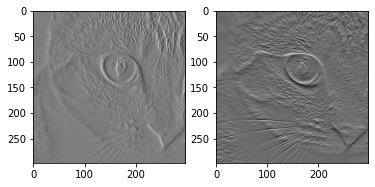

In [31]:
#Creating the masks
mask_x = np.array([[-1, 0, 1],
                   [-1, 0, 1],
                   [-1, 0, 1]])
mask_y = mask_x.T

#Applying the mask filters onto the input image
out_x = conv2d(input_mat, mask_x)
out_y = conv2d(input_mat, mask_y)

#Showing each mask applied to the image
mask_out = plt.figure()
mask_out.add_subplot(1, 2, 1)
plt.imshow(out_x, cmap = 'gray')
mask_out.add_subplot(1, 2, 2)
plt.imshow(out_y, cmap = 'gray')

sobel_filter = np.zeros(out_x.shape)
max_value = 0

#Calculating the magnitudes for x and y vectors
for i in range(out_x.shape[0]):
  for j in range(out_x.shape[1]):
    sobel_filter[i][j] = math.sqrt((pow(out_x[i][j],2)) + (pow(out_y[i][j], 2)))
    if(sobel_filter[i][j] > max_value):
      max_value = sobel_filter[i][j]

#Putting the output through Normalization
for i in range(out_x.shape[0]):
  for j in range(out_x.shape[1]):
    sobel_filter[i][j] = (sobel_filter[i][j] / max_value)

(300, 451)
(298, 298)


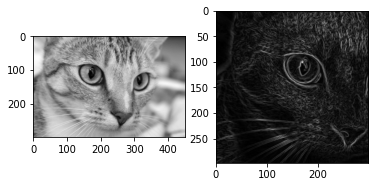

In [32]:
#Printing the image in grayscale and the sobel filter
sobel_out = plt.figure()
sobel_out.add_subplot(1, 2, 1)
plt.imshow(input_mat, cmap = 'gray')
print(input_mat.shape)
sobel_out.add_subplot(1, 2, 2)
plt.imshow(sobel_filter, cmap = 'gray')
print(sobel_filter.shape)

#Problem 2

In [0]:
def maxpooling2d(input_mat, scalar, stride = 1):
  #Ensures that the input matrix isn't a numpy array
  try:
    input_matx = np.array(input_mat)
    a, b = input_matx.shape
  except:
    raise Exception("Error: The input matrix cannot be converted into a numpy array.")

  #Ensuring that input is not empty
  if(input_matx.shape == 0):
    print("Error: The input or kernel matrices are empty.")

  #Ensuring that scalar is larger than the dimensions of input
  if(a < scalar or b < scalar):
    raise Exception("Error: The scalar is larger than the dimensions of the input")

  #Creates an output matrix with dimensions based off the input matrix, and ensuring that that the width and height are equal
  output_dim = np.ceil((a - scalar + 1) / stride).astype(int)
  output_mat = np.zeros(shape = (output_dim, output_dim))

  #A for loop that creates the output matrix with the max of the input matrix and the scalar and stride
  for i in range(output_dim):
    x = stride * i
    for j in range(output_dim):
      y = stride * j
      output_mat[i, j] = np.max(input_matx[x: scalar + x, y: scalar + y])

  return output_mat

Here is the maxpooling2d function running on test data

In [34]:
input_mat_example = np.array([[1, 2, 3],
                              [4, 5, 6],
                              [7, 8, 9]])

print(maxpooling2d(input_mat_example, 2))

[[5. 6.]
 [8. 9.]]


Creating 3 examples, showing how the maxpool affectes the image depending on the scalar.

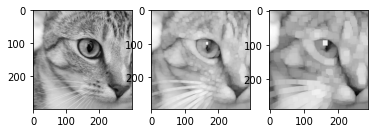

In [35]:
maxpool_0 = maxpooling2d(input_mat, 1)
maxpool_1 = maxpooling2d(input_mat, 7)
maxpool_2 = maxpooling2d(input_mat, 14)

maxpool_out = plt.figure()
maxpool_out.add_subplot(1, 3, 1)
plt.imshow(maxpool_0, cmap = 'gray')
maxpool_out.add_subplot(1, 3, 2)
plt.imshow(maxpool_1, cmap = 'gray')
maxpool_out.add_subplot(1, 3, 3)
plt.imshow(maxpool_2, cmap = 'gray')

#Problem 3.a

In [36]:
!wget --no-check-certificate\
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip\
  -O /tmp/cats_and_dogs_filtered.zip

--2020-04-20 18:43:04--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.191.128, 2607:f8b0:4001:c17::80
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.191.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   157MB/s    in 0.4s    

2020-04-20 18:43:05 (157 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

#Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

#Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

#Directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

#Directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

Convolutional Base

In [0]:
from keras.applications import Xception

conv_base = Xception(
    weights = 'imagenet',
    include_top = False,
    input_shape = (150, 150, 3))

#Freezing the convolutional base
conv_base.trainable = False

Concatenation of the convolutional base and densely connected layers

In [47]:
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 5, 5, 2048)        20861480  
_________________________________________________________________
flatten_9 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_23 (Dense)             (None, 256)               13107456  
_________________________________________________________________
dense_24 (Dense)             (None, 16)                4112      
_________________________________________________________________
dropout_8 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 17        
Total params: 33,973,065
Trainable params: 13,111,585
Non-trainable params: 20,861,480
_________________________________

Train model end to end with frozen convolutional base

In [40]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

#Data augmentation
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

#Compiling the model

model.compile(
    loss='binary_crossentropy', 
    optimizer=optimizers.RMSprop(lr=2e-5), 
    metrics=['acc'])

#Training the model
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 28s 278ms/step - loss: 0.4937 - acc: 0.7535 - val_loss: 0.0540 - val_acc: 0.9510
Epoch 2/30
100/100 [==============================] - 24s 244ms/step - loss: 0.4053 - acc: 0.8170 - val_loss: 0.0270 - val_acc: 0.9550
Epoch 3/30
100/100 [==============================] - 24s 239ms/step - loss: 0.3635 - acc: 0.8330 - val_loss: 0.0771 - val_acc: 0.9330
Epoch 4/30
100/100 [==============================] - 24s 239ms/step - loss: 0.3582 - acc: 0.8330 - val_loss: 0.5681 - val_acc: 0.9660
Epoch 5/30
100/100 [==============================] - 24s 239ms/step - loss: 0.3279 - acc: 0.8535 - val_loss: 0.0467 - val_acc: 0.9670
Epoch 6/30
100/100 [==============================] - 24s 239ms/step - loss: 0.3351 - acc: 0.8605 - val_loss: 0.0281 - val_acc: 0.9660
Epoch 7/30
100/100 [==============================] - 24s 238ms/step - loss: 0.3150 - acc: 0.8560 - val_lo

Display the curves of loss and accuracy during training

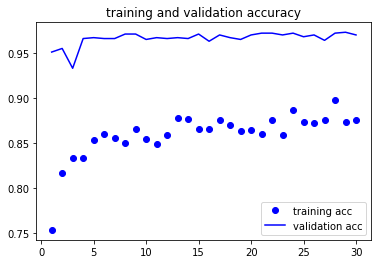

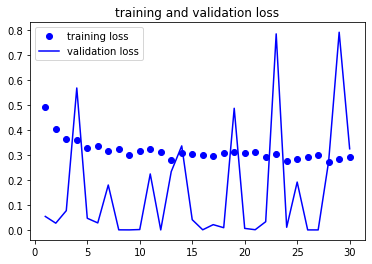

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Training and Validation accuracy
plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()

#Training and Validation loss
plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

Fine-tuning

In [48]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'dense_2':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

#Compiling the model
model.compile(
              loss = 'binary_crossentropy',
              optimizer = optimizers.RMSprop(lr = 1e-10),
              metrics = ['acc'])

#Training the model
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = 50
)

Epoch 1/100
100/100 [==============================] - 27s 274ms/step - loss: 0.7267 - acc: 0.4950 - val_loss: 0.6557 - val_acc: 0.4750
Epoch 2/100
100/100 [==============================] - 24s 236ms/step - loss: 0.7341 - acc: 0.4795 - val_loss: 0.7183 - val_acc: 0.4760
Epoch 3/100
100/100 [==============================] - 24s 236ms/step - loss: 0.7309 - acc: 0.4955 - val_loss: 0.7271 - val_acc: 0.4760
Epoch 4/100
100/100 [==============================] - 24s 237ms/step - loss: 0.7281 - acc: 0.4970 - val_loss: 0.6192 - val_acc: 0.4760
Epoch 5/100
100/100 [==============================] - 24s 237ms/step - loss: 0.7342 - acc: 0.4860 - val_loss: 0.7188 - val_acc: 0.4760
Epoch 6/100
100/100 [==============================] - 24s 239ms/step - loss: 0.7381 - acc: 0.4840 - val_loss: 0.7659 - val_acc: 0.4760
Epoch 7/100
100/100 [==============================] - 24s 238ms/step - loss: 0.7431 - acc: 0.4750 - val_loss: 0.7059 - val_acc: 0.4760
Epoch 8/100
100/100 [===========================

Display learning curves during fine-tuning

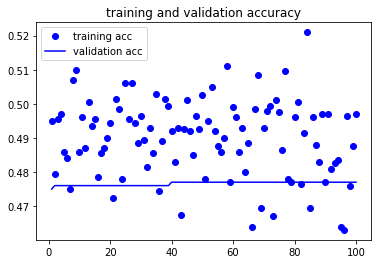

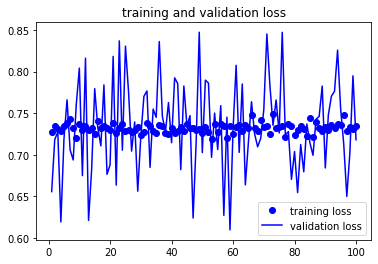

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# training and validation accuracy
plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()

# training and validation loss
plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

Print out accuracy and validation loss

In [50]:
val_loss, val_acc = model.evaluate_generator(validation_generator, steps = 50)
print("validation Loss: ", val_loss)
print("Validation Accuracy: ", val_acc)

validation Loss:  0.7223058342933655
Validation Accuracy:  0.47699999809265137
